<a href="https://colab.research.google.com/github/yahafifi/AI_Platforms_Fall_2025_2026/blob/main/Section%202%20PyTorch101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

A **Tensor** is **the core data structure** used in **PyTorch, TensorFlow**, and most deep learning frameworks.

Think of it as a **multi-dimensional** array (like a generalization of vectors and matrices).

In [2]:
import torch

# 0D tensor (scalar)
x = torch.tensor(5)

# 1D tensor (vector)
v = torch.tensor([1, 2, 3])

# 2D tensor (matrix)
m = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

# 3D tensor
t = torch.tensor([[[1, 2], [3, 4]],
                  [[5, 6], [7, 8]]])

print(x.shape)  # torch.Size([])
print(v.shape)  # torch.Size([3])
print(m.shape)  # torch.Size([2, 3])
print(t.shape)  # torch.Size([2, 2, 2])


torch.Size([])
torch.Size([3])
torch.Size([2, 3])
torch.Size([2, 2, 2])


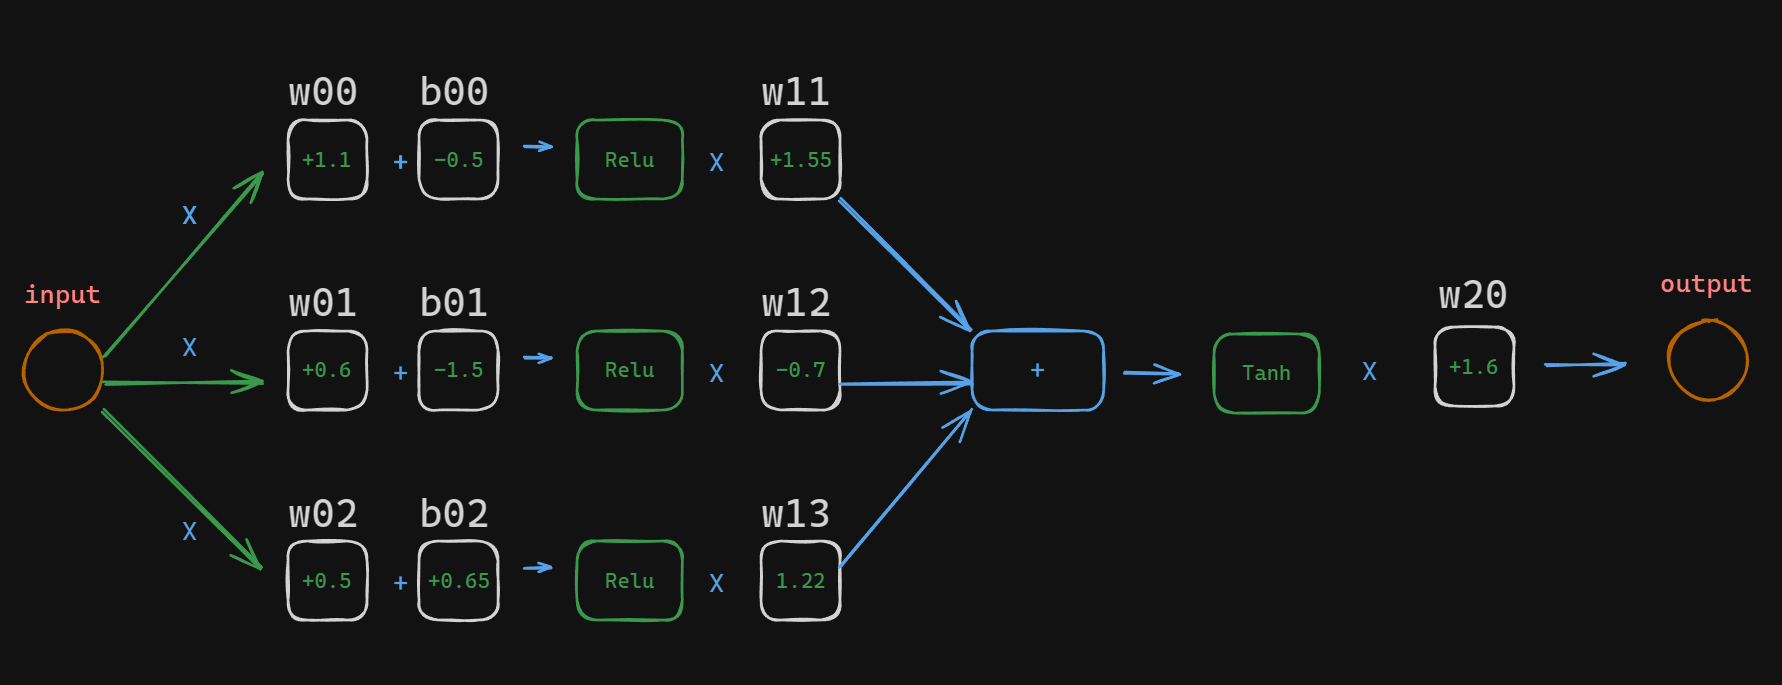

In [4]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD

import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
class MohamedNN(nn.Module):

    def __init__(self):

        super().__init__()

        self.w00 = nn.Parameter( torch.tensor(1.1), requires_grad=False ) # self.w00 = 1.1
        self.b00 = nn.Parameter(torch.tensor(-0.5), requires_grad=False)

        self.w01 = nn.Parameter(torch.tensor(0.6), requires_grad=False)
        self.b01 = nn.Parameter(torch.tensor(-1.5), requires_grad=False)

        self.w02 = nn.Parameter(torch.tensor(0.5), requires_grad=False)
        self.b02 = nn.Parameter(torch.tensor(0.65), requires_grad=False)

        self.w11 = nn.Parameter(torch.tensor(1.55), requires_grad=False)
        self.w12 = nn.Parameter(torch.tensor(-0.7), requires_grad=False)
        self.w13 = nn.Parameter(torch.tensor(1.22), requires_grad=False)

        self.w20 = nn.Parameter(torch.tensor(1.6), requires_grad=False)
    def forward(self, input):

        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = F.relu(input_to_layer_01)
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = F.relu(input_to_layer_02)
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = F.relu(input_to_layer_03)
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = F.tanh(output)
        output = output * self.w20

        return output

In [6]:
first_model = MohamedNN()

In [10]:
true_inputs =  torch.linspace(start=1, end=2.5, steps=40)
true_inputs

tensor([1.0000, 1.0385, 1.0769, 1.1154, 1.1538, 1.1923, 1.2308, 1.2692, 1.3077,
        1.3462, 1.3846, 1.4231, 1.4615, 1.5000, 1.5385, 1.5769, 1.6154, 1.6538,
        1.6923, 1.7308, 1.7692, 1.8077, 1.8462, 1.8846, 1.9231, 1.9615, 2.0000,
        2.0385, 2.0769, 2.1154, 2.1538, 2.1923, 2.2308, 2.2692, 2.3077, 2.3462,
        2.3846, 2.4231, 2.4615, 2.5000])

In [11]:
true_outputs = first_model(true_inputs)
true_outputs

tensor([1.5702, 1.5750, 1.5790, 1.5824, 1.5853, 1.5877, 1.5897, 1.5914, 1.5928,
        1.5939, 1.5949, 1.5958, 1.5965, 1.5970, 1.5975, 1.5979, 1.5983, 1.5985,
        1.5988, 1.5990, 1.5991, 1.5993, 1.5994, 1.5995, 1.5996, 1.5996, 1.5997,
        1.5998, 1.5998, 1.5998, 1.5999, 1.5999, 1.5999, 1.5999, 1.5999, 1.5999,
        1.6000, 1.6000, 1.6000, 1.6000])

Text(0.5, 0, 'input')

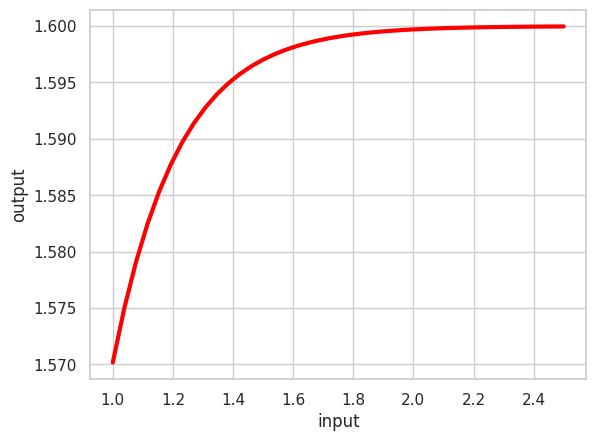

In [ ]:
sns.set(style="whitegrid")

sns.lineplot(
    x=true_inputs,
    y=true_outputs,
    color='red',
    linewidth=3
)

plt.ylabel('output')
plt.xlabel('input')

## Let's Train

In [7]:
class AliNN(nn.Module):

    def __init__(self):

        super().__init__()

        self.w00 = nn.Parameter( torch.tensor(0.0), requires_grad=True )
        self.b00 = nn.Parameter(torch.tensor(-0.5), requires_grad=False)

        self.w01 = nn.Parameter(torch.tensor(0.6), requires_grad=False)
        self.b01 = nn.Parameter(torch.tensor(-1.5), requires_grad=False)

        self.w02 = nn.Parameter(torch.tensor(0.0), requires_grad=True)
        self.b02 = nn.Parameter(torch.tensor(0.65), requires_grad=False)

        self.w11 = nn.Parameter(torch.tensor(1.55), requires_grad=False)
        self.w12 = nn.Parameter(torch.tensor(-0.7), requires_grad=False)
        self.w13 = nn.Parameter(torch.tensor(1.22), requires_grad=False)

        self.w20 = nn.Parameter(torch.tensor(0.0), requires_grad=True)
    def forward(self, input):

        input_to_layer_01 = input * self.w00 + self.b00
        layer_01_output = F.relu(input_to_layer_01)
        layer_01_output = layer_01_output * self.w11

        input_to_layer_02 = input * self.w01 + self.b01
        layer_02_output = F.relu(input_to_layer_02)
        layer_02_output = layer_02_output * self.w12

        input_to_layer_03 = input * self.w02 + self.b02
        layer_03_output = F.relu(input_to_layer_03)
        layer_03_output = layer_03_output * self.w13

        output = layer_01_output + layer_02_output + layer_03_output

        output = F.tanh(output)
        output = output * self.w20

        return output

In [16]:
plain_first_nn = AliNN()

In [18]:
plain_first_nn.w00

Parameter containing:
tensor(0., requires_grad=True)

In [19]:
pred_outputs = plain_first_nn(true_inputs)
pred_outputs

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       grad_fn=<MulBackward0>)

Text(0.5, 0, 'input')

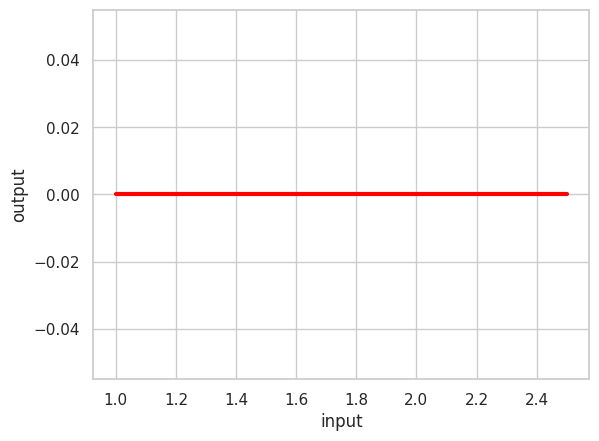

In [20]:
sns.set(style="whitegrid")

sns.lineplot(
    x=true_inputs,
    y=pred_outputs.detach(),
    color='red',
    linewidth=3
)

plt.ylabel('output')
plt.xlabel('input')

In [21]:
optimizer = SGD(plain_first_nn.parameters(), lr=0.01)
loss = nn.MSELoss()

In [28]:
for epoch in range(200):

    total_loss = 0

    for i in range(len(true_inputs)):

        input_i = true_inputs[i]
        true_output_i = true_outputs[i]

        pred_output_i = plain_first_nn(input_i)

        loss_value = loss(pred_output_i, true_output_i)

        loss_value.backward()

        total_loss += loss_value

    print("Epoch:", epoch, " | Total Loss:", total_loss)

    optimizer.step()
    optimizer.zero_grad()


Epoch: 0  | Total Loss: tensor(0.0057, grad_fn=<AddBackward0>)
Epoch: 1  | Total Loss: tensor(0.0057, grad_fn=<AddBackward0>)
Epoch: 2  | Total Loss: tensor(0.0057, grad_fn=<AddBackward0>)
Epoch: 3  | Total Loss: tensor(0.0057, grad_fn=<AddBackward0>)
Epoch: 4  | Total Loss: tensor(0.0057, grad_fn=<AddBackward0>)
Epoch: 5  | Total Loss: tensor(0.0057, grad_fn=<AddBackward0>)
Epoch: 6  | Total Loss: tensor(0.0056, grad_fn=<AddBackward0>)
Epoch: 7  | Total Loss: tensor(0.0056, grad_fn=<AddBackward0>)
Epoch: 8  | Total Loss: tensor(0.0056, grad_fn=<AddBackward0>)
Epoch: 9  | Total Loss: tensor(0.0056, grad_fn=<AddBackward0>)
Epoch: 10  | Total Loss: tensor(0.0056, grad_fn=<AddBackward0>)
Epoch: 11  | Total Loss: tensor(0.0055, grad_fn=<AddBackward0>)
Epoch: 12  | Total Loss: tensor(0.0055, grad_fn=<AddBackward0>)
Epoch: 13  | Total Loss: tensor(0.0055, grad_fn=<AddBackward0>)
Epoch: 14  | Total Loss: tensor(0.0055, grad_fn=<AddBackward0>)
Epoch: 15  | Total Loss: tensor(0.0055, grad_fn=<A

In [30]:
plain_first_nn.w00
plain_first_nn.w02

Parameter containing:
tensor(0.9823, requires_grad=True)

In [31]:
pred_outputs = plain_first_nn(true_inputs)
pred_outputs

tensor([1.5528, 1.5579, 1.5626, 1.5669, 1.5708, 1.5744, 1.5776, 1.5806, 1.5833,
        1.5858, 1.5881, 1.5902, 1.5921, 1.5938, 1.5954, 1.5968, 1.5981, 1.5993,
        1.6004, 1.6014, 1.6023, 1.6032, 1.6039, 1.6046, 1.6052, 1.6058, 1.6063,
        1.6068, 1.6073, 1.6077, 1.6080, 1.6084, 1.6087, 1.6089, 1.6092, 1.6094,
        1.6096, 1.6098, 1.6100, 1.6102], grad_fn=<MulBackward0>)

Text(0.5, 0, 'input')

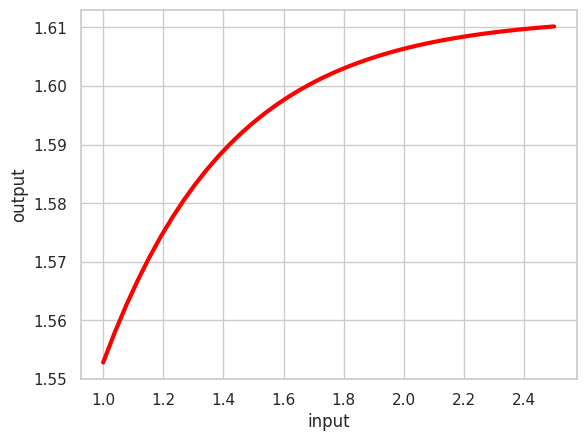

In [32]:
sns.set(style="whitegrid")

sns.lineplot(
    x=true_inputs,
    y=pred_outputs.detach(),
    color='red',
    linewidth=3
)

plt.ylabel('output')
plt.xlabel('input')

In [33]:
plain_first_nn.w00

Parameter containing:
tensor(0., requires_grad=True)

In [34]:
plain_first_nn.w02

Parameter containing:
tensor(0.9823, requires_grad=True)

In [35]:
plain_first_nn.w20

Parameter containing:
tensor(1.6118, requires_grad=True)